I a [previous post](../embedding-matplotlib-animations-in-jupyter-notebooks), I outlined how to embed a Matplotlib Animation directly in the Jupyter Notebook as a HTML5 video. In this notebook, we take the same Animation and save it as a GIF using Imagemagick. First, let us reproduce the `FuncAnimation` object from the notebook.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image

In [3]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

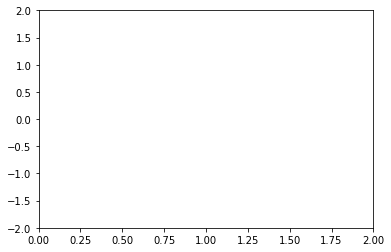

In [4]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [5]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [6]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [7]:
# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [8]:
anim

Now, we just need to [save](http://matplotlib.org/api/animation_api.html#matplotlib.animation.Animation.save) the animation instance with `writer=imagemagick`. But before we do that, we first make sure `imagemagick` has been properly installed on our system.

In [9]:
!brew install imagemagick

Now we can go ahead and save it as a GIF.

In [10]:
anim.save('../../files/animation.gif', writer='imagemagick', fps=60)

Finally, let's read it back in and display it to make sure it saved as expected.

In [11]:
Image(url='../../../animation.gif')